In [1]:
# Keras Hello World
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])

In [2]:
import tensorflow as tf
import numpy as np
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random.uniform(shape=(1,), minval=-1.0, maxval=1.0))
b = tf.Variable(tf.zeros(shape=(1,)))
# Minimize the mean squared errors.
def cost():
  y = W * x_data + b
  loss = tf.reduce_mean(tf.square(y - y_data))
  return loss
# SGD is the equivalent for GradientDescentOptimizer
optimizer = tf.optimizers.SGD(0.5)
for e in range(200):
  optimizer.minimize(cost, var_list=[W, b])
if e % 20 == 0:
  print(f'W: {W.numpy()}, b: {b.numpy()}')
# Learns best fit is W: [0.1], b: [0.3]


## Tensorflow version 1 (forced)

In [3]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
import tensorflow.compat.v1 as tf


In [4]:
sess = tf.Session()
a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a+b))

42


In [5]:
# Linear Regression using Tensorflow
import tensorflow as tf
# Force TF1.X compatibility mode when using TF 2.X library
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
import tensorflow.compat.v1 as tf
import numpy as np
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
# Before starting, initialize the variables. We will 'run' this first.
init = tf.initialize_all_variables()
# Launch the graph.
sess = tf.Session()
sess.run(init)
# Fit the line.
for step in range(201):
  sess.run(train)
if step % 20 == 0:
  print(step, sess.run(W), sess.run(b))
# Learns best fit is W: [0.1], b: [0.3]

Instructions for updating:
Use `tf.global_variables_initializer` instead.
200 [0.0999999] [0.30000007]


In [6]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential([
Dense(12, input_dim=8, activation='relu'),
Dense(8, activation='relu'),
Dense(1, activation='sigmoid')
])
# You can also simply add layers via the .add() method.
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [7]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Restart kernel first, then run cell to use tensorflow 2

In [8]:
# TensorFlow Hello World
import tensorflow as tf
#sess = tf.Session() # This is only needed for TF 1.X
# Computational Graph to be compiled and then run using the session
a = tf.constant(10)
b = tf.constant(32)
# print(sess.run(a+b)) # Not session.run not needed in TF2.X
# In TF2.X eager execution compiles the computation graph in the background
print(a+b) # TF 2.X is more direct. Just write a+b

Tensor("add_2:0", shape=(), dtype=int32)


In [9]:
import tensorflow as tf
import numpy as np
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random.uniform(shape=(1,), minval=-1.0, maxval=1.0))
b = tf.Variable(tf.zeros(shape=(1,)))
# Minimize the mean squared errors.
def cost():
  y = W * x_data + b
  loss = tf.reduce_mean(tf.square(y - y_data))
  return loss
# SGD is the equivalent for GradientDescentOptimizer
optimizer = tf.optimizers.SGD(0.5)
for e in range(200):
  optimizer.minimize(cost, var_list=[W, b])
if e % 20 == 0:
  print(f'W: {W.numpy()}, b: {b.numpy()}')
# Learns best fit is W: [0.1], b: [0.3]


In [10]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
import tensorflow as tf

tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
import tensorflow.compat.v1 as tf

iris = datasets.load_iris()
x, y = iris.data, iris.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

feature_columns = [tf.feature_column.numeric_column('x', shape=x_train.shape[1:])]

classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=3)

train_inputs_fn = tf.estimator.inputs.numpy_input_fn(x={'x': x_train}, y=y_train, num_epochs=None, shuffle=True)

classifier.train(input_fn=train_inputs_fn, steps=1000)

test_inputs_fn = tf.estimator.inputs.numpy_input_fn(x={'x': x_test}, y=y_test, num_epochs=1, shuffle=False)

score = classifier.evaluate(input_fn=test_inputs_fn)
print('Accuracy (tensorflow): {0:f}'.format(score['accuracy']))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\amir_\\AppData\\Local\\Temp\\tmp1qb2niv2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Instructions for updating:
Use Variable.read

### TensorFlow 2

In [49]:
# Keras version of Iris classifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
import pandas as pd
import numpy as np

# loading and pre-processing of the data
# We use the 2 class version of iris data set
iris = pd.read_csv("IrisTwoClass.csv")
x = np.array(iris.drop("Class",axis=1))
y = np.array(iris["Class"])
# Split dataset into train / test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
x, y, test_size=0.2, random_state=42)
# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# create model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
# training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))
# eval model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# calculate predictions
predictions = model.predict(x_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)
model.summary()

Train on 80 samples, validate on 20 samples
Epoch 1/10
10/80 [==>...........................] - ETA: 1s - loss: 0.6656 - accuracy: 0.7000

C:\Users\amir_\anaconda3\envs\deeplearning_gpu\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


80/80 [==============================] - 2s 27ms/sample - loss: 0.6321 - accuracy: 0.8250 - val_loss: 0.5983 - val_accuracy: 0.9500
Epoch 2/10
80/80 [==============================] - 0s 687us/sample - loss: 0.5921 - accuracy: 0.9875 - val_loss: 0.5614 - val_accuracy: 1.0000
Epoch 3/10
80/80 [==============================] - 0s 800us/sample - loss: 0.5515 - accuracy: 1.0000 - val_loss: 0.5217 - val_accuracy: 1.0000
Epoch 4/10
80/80 [==============================] - 0s 762us/sample - loss: 0.5113 - accuracy: 1.0000 - val_loss: 0.4782 - val_accuracy: 1.0000
Epoch 5/10
80/80 [==============================] - 0s 687us/sample - loss: 0.4686 - accuracy: 1.0000 - val_loss: 0.4343 - val_accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 0s 662us/sample - loss: 0.4236 - accuracy: 1.0000 - val_loss: 0.3885 - val_accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 0s 657us/sample - loss: 0.3782 - accuracy: 1.0000 - val_loss: 0.3385 - val_accuracy: 1.0000
Epoc

C:\Users\amir_\anaconda3\envs\deeplearning_gpu\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1]
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 10)                50        
                                                                 
 dense_79 (Dense)            (None, 20)                220       
                                                                 
 dense_80 (Dense)            (None, 10)                210       
                                                                 
 dense_81 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


#### Using visualkeras to visual model

In [50]:
import visualkeras
visualkeras.layered_view(model)

### Plotting model training, validation and loss

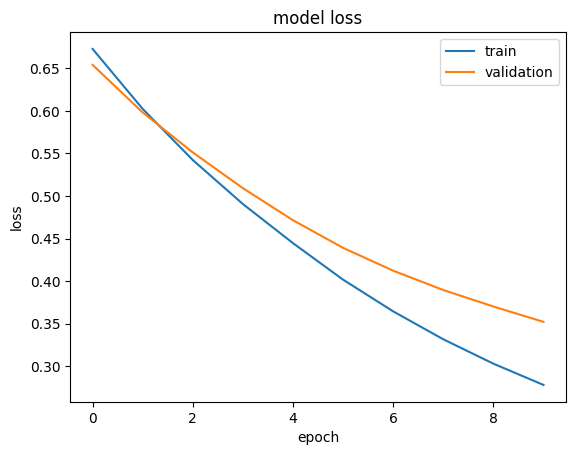

In [36]:
#loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

### Plotting training and validation accuracy and loss respectively

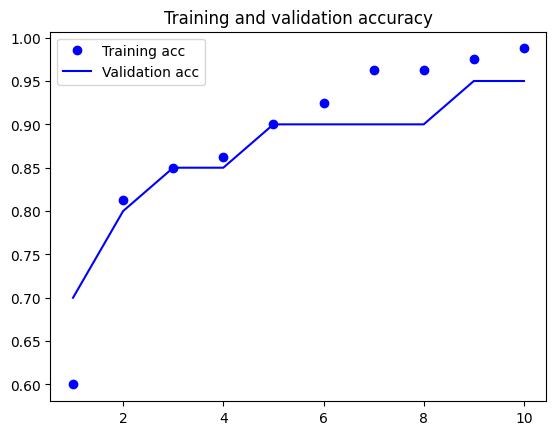

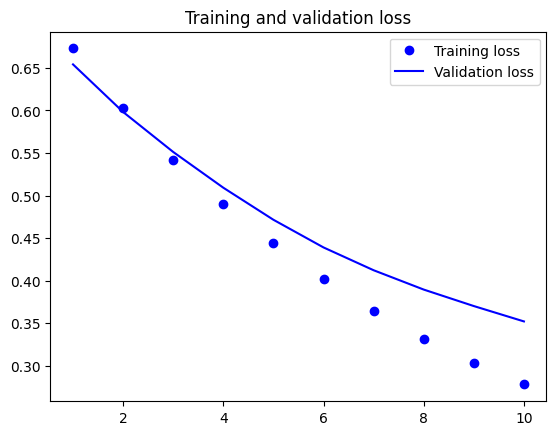

In [40]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# This returns a tensor
inputs = Input(shape=(4,))
# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train,epochs=10, batch_size=10, validation_data=(x_test, y_test)) # starts training

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 1s 11ms/sample - loss: 0.4445 - accuracy: 1.0000 - val_loss: 0.3586 - val_accuracy: 1.0000
Epoch 2/10
80/80 [==============================] - 1s 16ms/sample - loss: 0.2613 - accuracy: 1.0000 - val_loss: 0.2499 - val_accuracy: 1.0000
Epoch 3/10
80/80 [==============================] - 0s 987us/sample - loss: 0.1652 - accuracy: 1.0000 - val_loss: 0.1812 - val_accuracy: 1.0000
Epoch 4/10
80/80 [==============================] - 0s 975us/sample - loss: 0.1044 - accuracy: 1.0000 - val_loss: 0.1318 - val_accuracy: 1.0000
Epoch 5/10
80/80 [==============================] - 0s 962us/sample - loss: 0.0660 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 0s 975us/sample - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 0s 850us/sample - loss: 0.0260 - accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


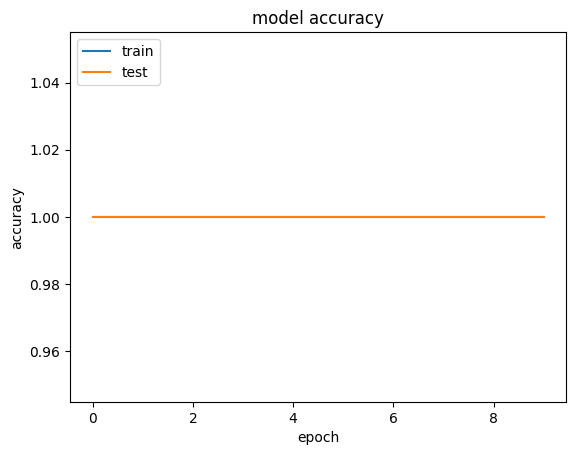

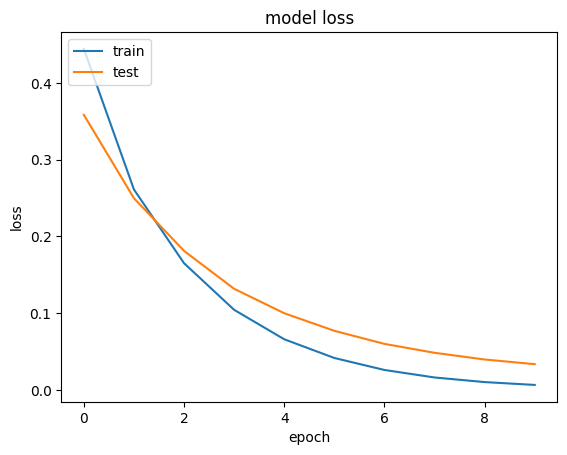

In [46]:
# Fit the model
# history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()